## Grupo 2: Análisis de reservas y cancelaciones hoteleras
🎯 Objetivo del proyecto
Analizar los datos de reservas de hoteles para comprender el perfil de los clientes, identificar patrones de comportamiento (estacionalidad, duración de la estancia, precios) y estudiar los factores que influyen en las cancelaciones, utilizando herramientas de análisis de datos en Python.

### 1. Introducción y descripción del dataset

- Breve explicación del contexto del análisis

- Descripción de las variables disponibles

- Objetivo del estudio

In [114]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('hotel_bookings.csv')

### 2. Perfil general de las reservas

Objetivo: Entender cómo son las reservas y los clientes en general.

Inspeccionamos el dataset

In [115]:
print("--- Primeras 5 filas ---")
print(df.head())

print("\n--- Información general y tipos de datos ---")
df.info()

print("\n--- Resumen estadístico de las columnas numéricas ---")
print(df.describe())

print("\n--- Cuántos datos nulos hay ---")
print(df.isnull().sum())

print("\n--- Cuántos duplicados hay ---")
print(df.duplicated().sum())

--- Primeras 5 filas ---
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ..

In [116]:
# Llenar valores nulos
df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna('Unknown')
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

df.rename(columns={'price': 'price'}, inplace=True)
# Llenar valores nulos
df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna('Unknown')
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

# Renombrar columna
df.rename(columns={'adr': 'price'}, inplace=True)

Analizamos el número de clientes que llegan cada año a los hoteles, diferenciando entre City Hotel y Resort Hotel. ¿Cómo varía la cantidad de clientes a lo largo de los años en cada tipo de hotel?

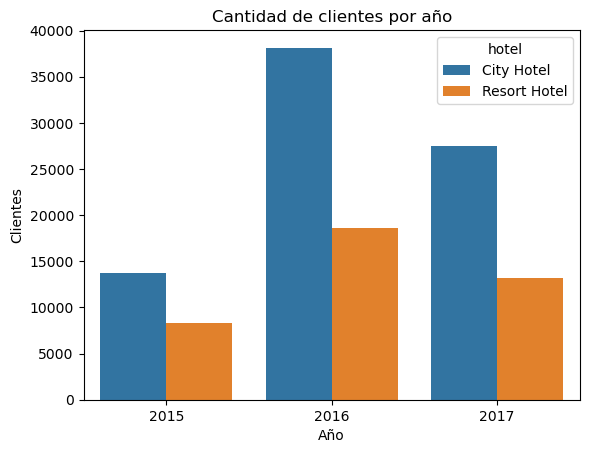

In [117]:
# Contar cuántos clientes hay por año de llegada y por tipo de hotel
clientes_hotel_anio = df.groupby(['arrival_date_year', 'hotel']).size().reset_index(name='cantidad_clientes')

# Crear un gráfico de barras
sns.barplot(data=clientes_hotel_anio, x='arrival_date_year', y='cantidad_clientes', hue='hotel')
plt.title('Cantidad de clientes por año')
plt.xlabel('Año')
plt.ylabel('Clientes')
plt.show()

Analizamos de cuántos países distintos eran los clientes que han hecho reservas en cada tipo de hotel (City Hotel y Resort Hotel)

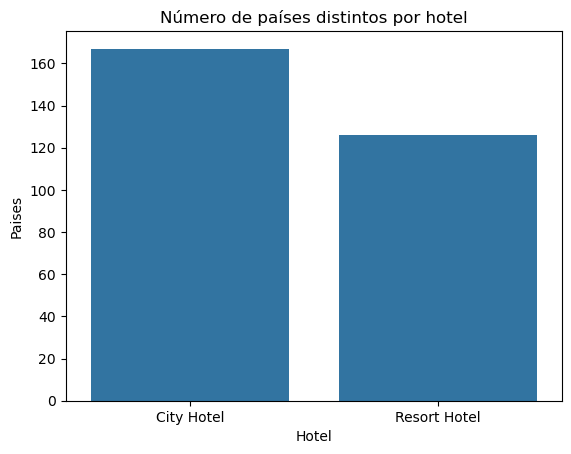

In [118]:
# Contar de cuántos países distintos eran los clientes que han hecho reservas en cada tipo de hotel
num_paises = df.groupby('hotel')['country'].nunique()

sns.barplot(x=num_paises.index, y=num_paises.values)
plt.title('Número de países distintos por hotel')
plt.xlabel('Hotel')
plt.ylabel('Paises')
plt.show()

Analizamos para cada tipo de hotel (City Hotel y Resort Hotel), la cantidad de reservas provenientes de cada país mediante un mapa coroplético mundial. ¿De qué países provienen los clientes de cada hotel y cuáles son los principales mercados de origen?

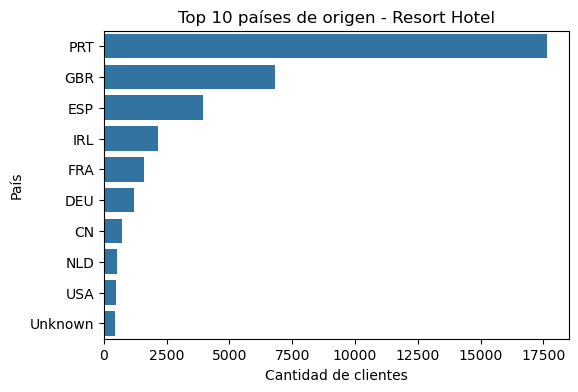

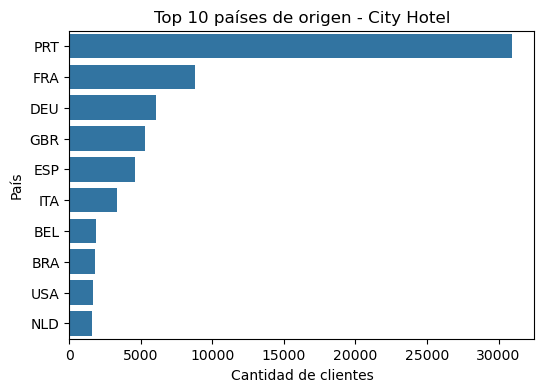

In [119]:
for hotel in df['hotel'].unique():
    df_hotel = df[df['hotel'] == hotel]
    
    # Contar cuántas reservas hay de cada país en cada hotel y tomar los 10 primeros
    top_10 = df_hotel['country'].value_counts().head(10).reset_index()
    top_10.columns = ['country', 'cantidad_clientes']
    
    # Crear gráfico de barras
    plt.figure(figsize=(6,4))
    sns.barplot(data=top_10, x='cantidad_clientes', y='country')
    plt.title(f'Top 10 países de origen - {hotel}')
    plt.xlabel('Cantidad de clientes')
    plt.ylabel('País')
    plt.show()

In [120]:
for hotel in df['hotel'].unique():
    # Contar cuántas reservas provienen de cada país en cada hotel
    reservas_hotel = df[df['hotel']==hotel]['country'].value_counts().reset_index()
    reservas_hotel.columns = ['country', 'reservas']
    
    # Crear un mapa coroplético
    fig = px.choropleth(
        reservas_hotel,
        locations='country',
        color='reservas',
        color_continuous_scale='Oranges',
        title=f'Reservas por país - {hotel}'
    )
    fig.show()

Analizamos la distribución de los canales de reserva utilizados por los clientes. ¿Qué canales de reserva utilizan los clientes y cuál es la proporción de cada uno?

distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64


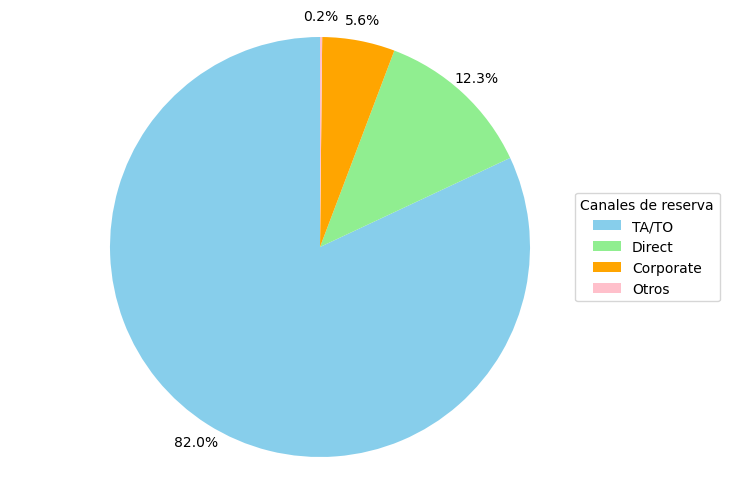

In [121]:
canales = df['distribution_channel'].value_counts()
print(canales)

# Umbral: menos del 5% se agrupa en 'Otros'
umbral = 0.05 * canales.sum()
canales_agrupados = canales.copy()
canales_agrupados[canales < umbral] = 0

otros = canales[canales < umbral].sum()
canales_agrupados = canales_agrupados[canales_agrupados>0]
canales_agrupados['Otros'] = otros

plt.figure(figsize=(8, 6))
# Crear gráfico circular
wedges, texts, autotexts = plt.pie(
    canales_agrupados.values,
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue','lightgreen','orange','pink'],
    pctdistance=1.1
)

# Agregar leyenda al lado
plt.legend(
    wedges,
    canales_agrupados.index,
    title="Canales de reserva",
    loc="center left",
    bbox_to_anchor=(0.9, 0, 0.5, 1)
)

plt.axis('equal')
plt.show()

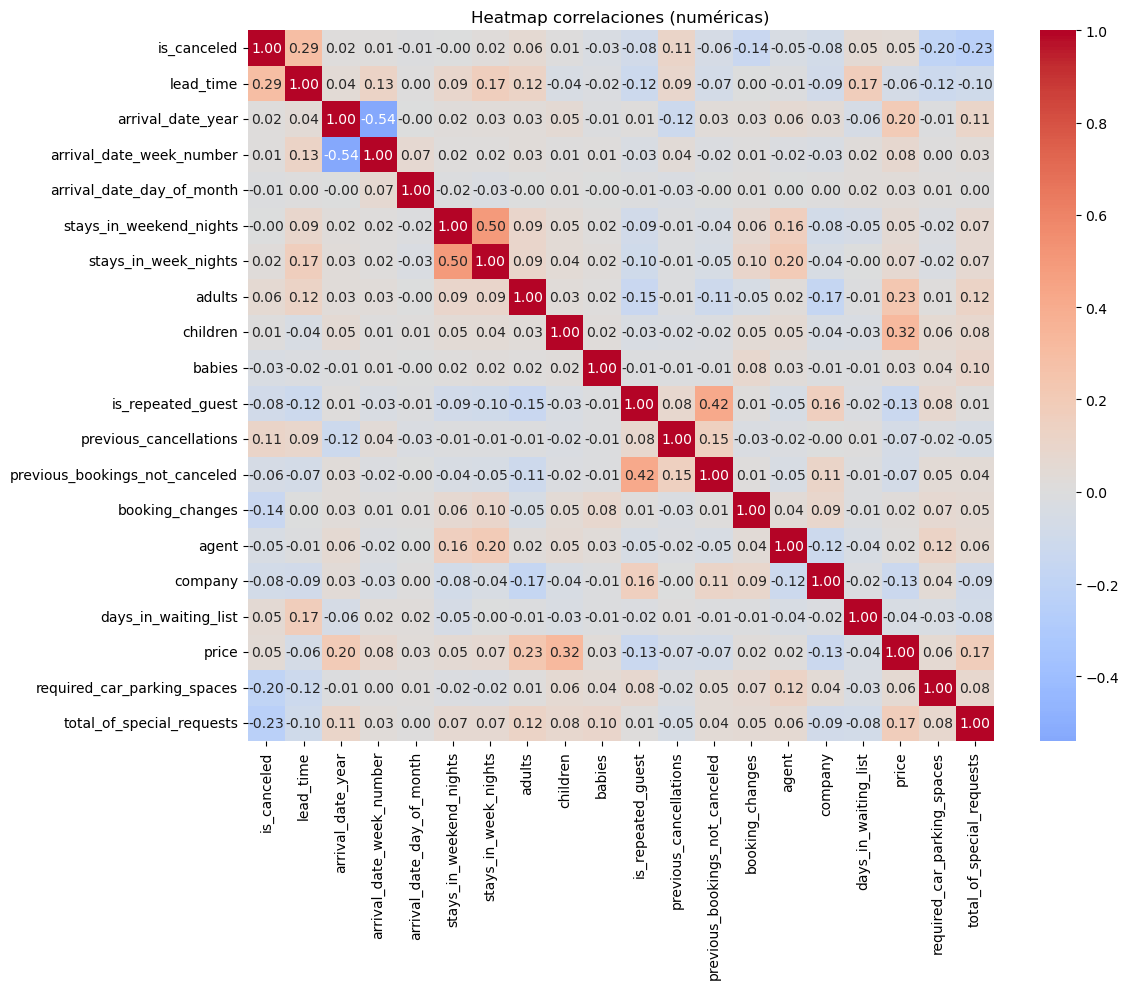

In [122]:
num_cols = df.select_dtypes(include=['number']).columns
corr = df[num_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Heatmap correlaciones (numéricas)')
plt.tight_layout()
plt.show()


### 3. Patrones de comportamiento y cancelaciones

Objetivo: Analizar cómo varían las reservas en función del tiempo, los precios y la estancia.

Analizamos el número de reservas por mes para determinar la estacionalidad. También analizamos el número de cancelaciones por mes.
¿En qué meses hay más reservas y cancelaciones?

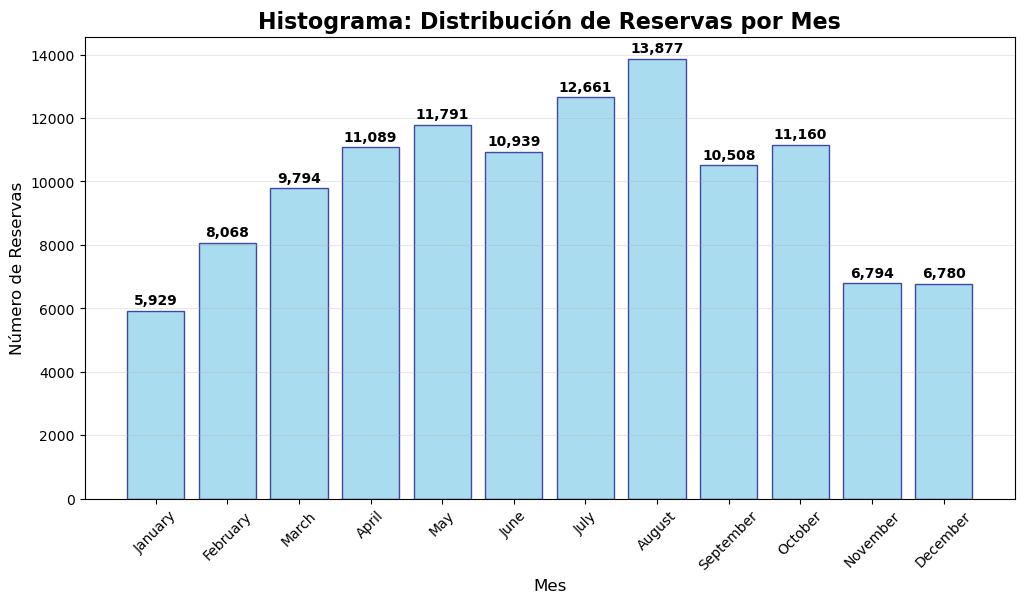

In [123]:
# Análisis de estacionalidad - Porcentaje de clientes por mes

# Contar reservas por mes
reservas_por_mes = df['arrival_date_month'].value_counts()

# Calcular porcentaje por mes
porcentaje_por_mes = (df['arrival_date_month'].value_counts(normalize=True) * 100).round(2)

# Crear una tabla más visual ORDENADA por mes cronológico
resumen_mes = pd.DataFrame({
    'Reservas': reservas_por_mes,
    'Porcentaje': porcentaje_por_mes
})

# Definir el orden correcto de los meses
orden_meses = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Reordenar según el orden cronológico de los meses
resumen_mes = resumen_mes.reindex(orden_meses)

# Histograma de reservas por mes
plt.figure(figsize=(12, 6))
plt.bar(resumen_mes.index, resumen_mes['Reservas'], color='skyblue', edgecolor='navy', alpha=0.7)
plt.title('Histograma: Distribución de Reservas por Mes', fontsize=16, fontweight='bold')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número de Reservas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for i, v in enumerate(resumen_mes['Reservas']):
    plt.text(i, v + 100, f'{v:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.show()

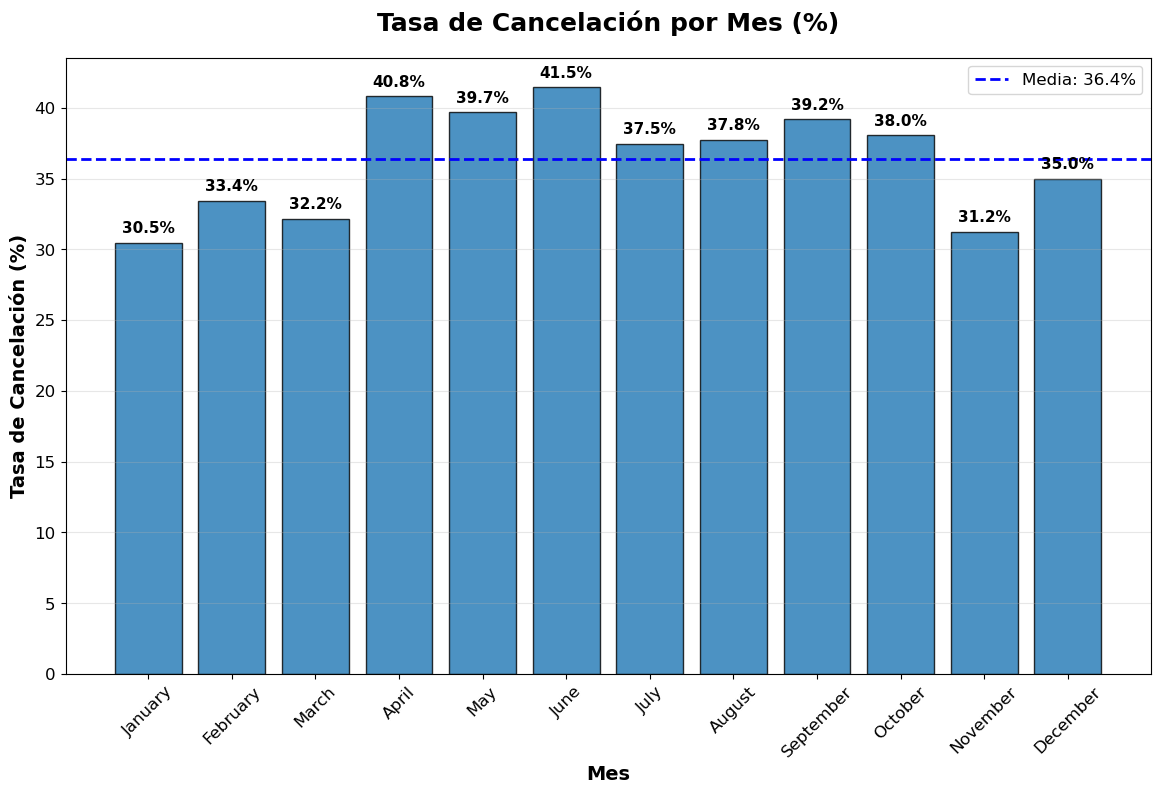

In [124]:
# Calcular tasa de cancelación por mes (cancelaciones/total_reservas_del_mes), calculamos la tasa para que el resultado sea independiente del numero de cancelaciones
tasa_cancelacion_mes = df.groupby('arrival_date_month')['is_canceled'].mean() * 100
tasa_cancelacion_ordenada = tasa_cancelacion_mes.reindex(orden_meses)

# Visualización de la tasa de cancelación por mes
plt.figure(figsize=(14, 8))

bars = plt.bar(tasa_cancelacion_ordenada.index, tasa_cancelacion_ordenada.values, edgecolor='black', alpha=0.8)

plt.title('Tasa de Cancelación por Mes (%)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Mes', fontsize=14, fontweight='bold')
plt.ylabel('Tasa de Cancelación (%)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Añadir valores en las barras
for i, (mes, tasa) in enumerate(tasa_cancelacion_ordenada.items()):
    plt.text(i, tasa + 0.5, f'{tasa:.1f}%', ha='center', va='bottom', 
             fontweight='bold', fontsize=11)

# Añadir línea de referencia con la media
media_cancelacion = tasa_cancelacion_ordenada.mean()
plt.axhline(y=media_cancelacion, color='blue', linestyle='--', linewidth=2, 
            label=f'Media: {media_cancelacion:.1f}%')

# Añadir rejilla y leyenda
plt.grid(axis='y', alpha=0.3)
plt.legend(fontsize=12)
plt.show()

Análisis de la variacion del precio con los meses

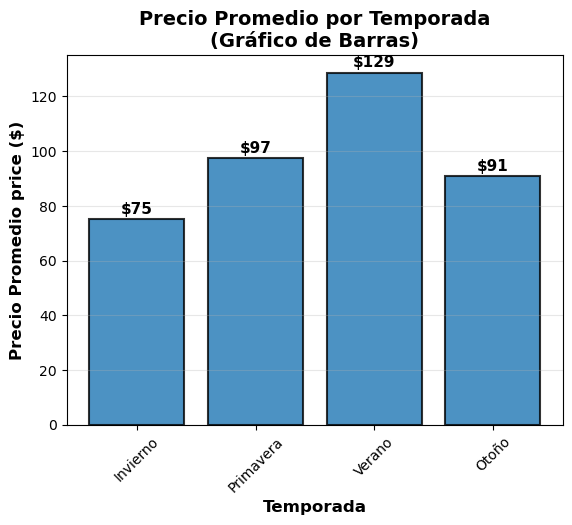

In [125]:
# Boxplot: Variación de precios según temporada

# Definir temporadas basándose en los meses
def categorizar_temporada(mes):
    if mes in ['December', 'January', 'February']:
        return 'Invierno'
    elif mes in ['March', 'April', 'May']:
        return 'Primavera'
    elif mes in ['June', 'July', 'August']:
        return 'Verano'
    else: 
        return 'Otoño'

# Crear columna de temporada
df['temporada'] = df['arrival_date_month'].apply(categorizar_temporada)

temporadas_ordenadas = ['Invierno', 'Primavera', 'Verano', 'Otoño']
datos_temporadas = [df[df['temporada'] == temp]['price'] for temp in temporadas_ordenadas]

# Gráfico de barras con precio promedio
precio_promedio_temp = df.groupby('temporada')['price'].mean().reindex(temporadas_ordenadas)
barras = plt.bar(temporadas_ordenadas, precio_promedio_temp.values, alpha=0.8 ,edgecolor='black', linewidth=1.5)

# Añadir valores en las barras
for bar, valor in zip(barras, precio_promedio_temp.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'${valor:.0f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.title('Precio Promedio por Temporada\n(Gráfico de Barras)', fontsize=14, fontweight='bold')
plt.xlabel('Temporada', fontsize=12, fontweight='bold')
plt.ylabel('Precio Promedio price ($)', fontsize=12, fontweight='bold')
plt.tick_params(axis='x', rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.show()

Análisis de la correlacion entre la antelación de la reserva y la tasa de cancelacion ¿influye en la probabilidad de cancelación?

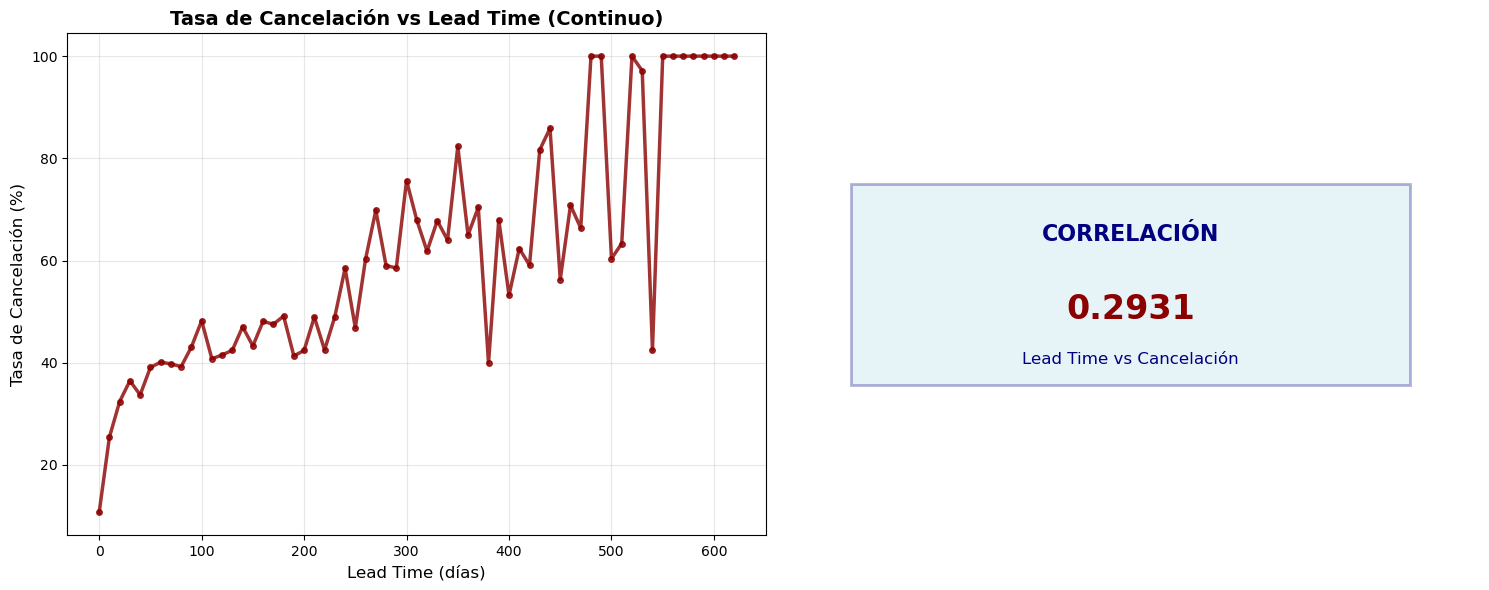

In [131]:
# Visualización: Tasa de cancelación vs Lead Time continuo

# Agrupar por lead time redondeado para crear una línea suave
df['leadtime_redondeado'] = (df['lead_time'] // 10) * 10  # Redondear a decenas
leadtime_cancel_continuo = df.groupby('leadtime_redondeado')['is_canceled'].agg(['mean', 'count']).reset_index()
leadtime_cancel_continuo['tasa_cancelacion'] = leadtime_cancel_continuo['mean'] * 100

# Filtrar solo lead times con al menos 10 reservas para evitar ruido
leadtime_cancel_continuo = leadtime_cancel_continuo[leadtime_cancel_continuo['count'] >= 10]

# Crear figura con subplot para gráfico y tarjeta
fig = plt.figure(figsize=(15, 6))

# Subplot 1: Gráfico de línea
ax1 = plt.subplot(1, 2, 1)
ax1.plot(leadtime_cancel_continuo['leadtime_redondeado'], leadtime_cancel_continuo['tasa_cancelacion'], 
         marker='o', linewidth=2.5, markersize=4, color='darkred', alpha=0.8)

ax1.set_title('Tasa de Cancelación vs Lead Time (Continuo)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Lead Time (días)', fontsize=12)
ax1.set_ylabel('Tasa de Cancelación (%)', fontsize=12)
ax1.grid(True, alpha=0.3)

# Subplot 2: Tarjeta de correlación
ax2 = plt.subplot(1, 2, 2)
ax2.axis('off')  # Quitar ejes

# Crear rectángulo para la tarjeta
from matplotlib.patches import Rectangle
rect = Rectangle((0.1, 0.3), 0.8, 0.4, linewidth=2, edgecolor='navy', facecolor='lightblue', alpha=0.3)
ax2.add_patch(rect)

# Añadir texto de correlación
ax2.text(0.5, 0.6, 'CORRELACIÓN', ha='center', va='center', fontsize=16, fontweight='bold', color='navy')
correlacion_leadtime_cancel = df['lead_time'].corr(df['is_canceled'])
ax2.text(0.5, 0.45, f'{correlacion_leadtime_cancel:.4f}', ha='center', va='center', fontsize=24, fontweight='bold', color='darkred')
ax2.text(0.5, 0.35, 'Lead Time vs Cancelación', ha='center', va='center', fontsize=12, color='navy')

plt.tight_layout()
plt.show()

¿Las cancelaciones varían por tipo de hotel?

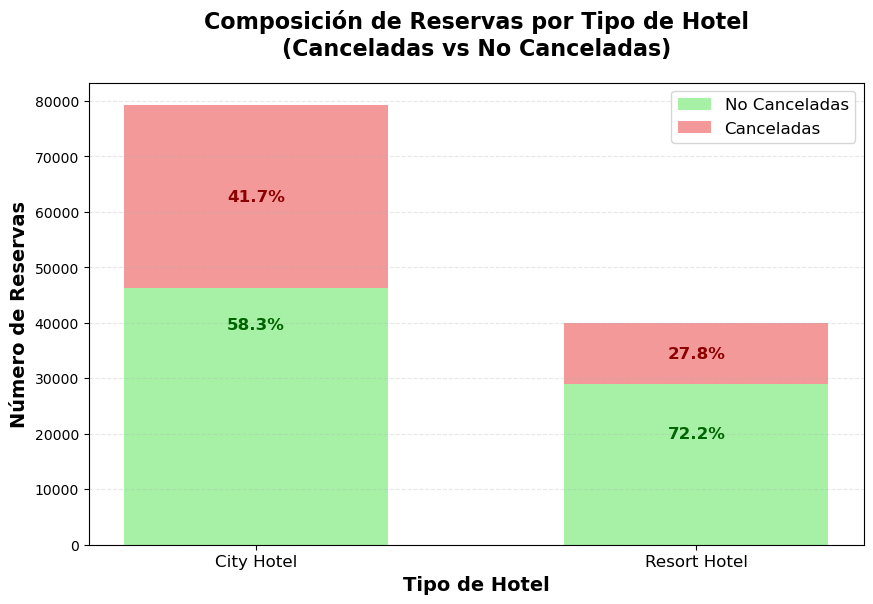

In [132]:
# Gráfico de composición - Reservas canceladas vs no canceladas por tipo de hotel

plt.figure(figsize=(10, 6))

# Preparar datos
tasa_por_tipo = df.groupby('hotel').agg({
    'is_canceled': ['count', 'sum', 'mean']
}).round(4)

# Simplificar nombres de columnas
tasa_por_tipo.columns = ['Total_Reservas', 'Total_Cancelaciones', 'Tasa_Cancelacion']
tasa_por_tipo['Tasa_Cancelacion_Pct'] = (tasa_por_tipo['Tasa_Cancelacion'] * 100).round(2)
hotels = tasa_por_tipo.index.tolist()
rates = tasa_por_tipo['Tasa_Cancelacion_Pct'].tolist()
no_canceladas = tasa_por_tipo['Total_Reservas'] - tasa_por_tipo['Total_Cancelaciones']
canceladas = tasa_por_tipo['Total_Cancelaciones']

width = 0.6
x_pos = np.arange(len(hotels))

# Crear gráfico de área apilada
plt.bar(x_pos, no_canceladas, width, label='No Canceladas', color='lightgreen', alpha=0.8)
plt.bar(x_pos, canceladas, width, bottom=no_canceladas, label='Canceladas', color='lightcoral', alpha=0.8)

# Añadir porcentajes en las áreas
for i, (hotel, rate) in enumerate(zip(hotels, rates)):
    total_height = tasa_por_tipo.loc[hotel, 'Total_Reservas']
    # Porcentaje de no canceladas
    plt.text(i, total_height/2, f'{100-rate:.1f}%', ha='center', va='center', 
             fontweight='bold', color='darkgreen', fontsize=12)
    # Porcentaje de canceladas
    plt.text(i, no_canceladas.iloc[i] + canceladas.iloc[i]/2, f'{rate:.1f}%', 
             ha='center', va='center', fontweight='bold', color='darkred', fontsize=12)

# Configurar el gráfico
plt.title('Composición de Reservas por Tipo de Hotel\n(Canceladas vs No Canceladas)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Tipo de Hotel', fontsize=14, fontweight='bold')
plt.ylabel('Número de Reservas', fontsize=14, fontweight='bold')
plt.xticks(x_pos, hotels, fontsize=12)
plt.legend(fontsize=12, loc='upper right')

# Añadir rejilla suave
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Ajustar layout
plt.show()


### 4. Predicción y recomendaciones

Objetivo: Explorar qué factores están más relacionados con las cancelaciones y proponer conclusiones prácticas.

¿Qué variables son más importantes para explicar una cancelación?

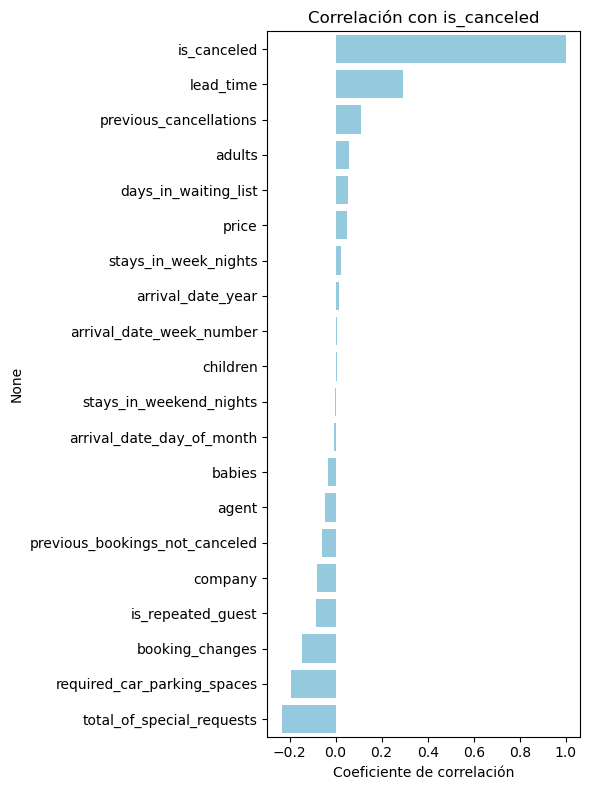

In [ ]:
# Calcular la correlación de todas las variables numéricas con la variable objetivo 'is_canceled'
corr_target = df[num_cols].corr()['is_canceled'].sort_values(ascending=False)

plt.figure(figsize=(6,8))

# Crear un gráfico de barras con los coeficientes de correlación
sns.barplot(x=corr_target.values, y=corr_target.index, color="skyblue")

plt.title("Correlación con is_canceled")
plt.xlabel("Coeficiente de correlación")
plt.tight_layout()
plt.show()

Análisis de la relación entre el tipo de cliente (nuevo o repetidor) y la cancelación de reservas.¿Los clientes repetidores cancelan más o menos sus reservas que los nuevos clientes?

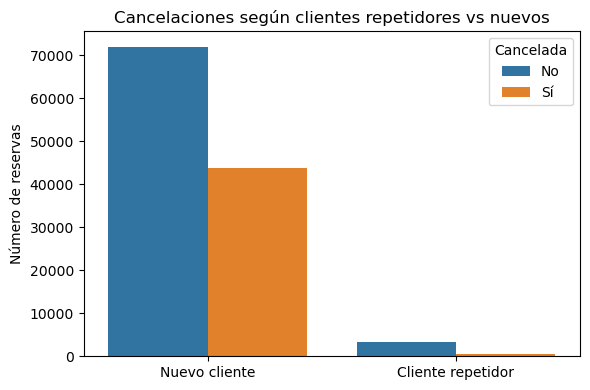

In [ ]:
plt.figure(figsize=(6,4))

# Crear un gráfico de barras que muestra el número de reservas
# según si el cliente es repetidor o no, diferenciando por cancelaciones
sns.countplot(x='is_repeated_guest', hue='is_canceled', data=df)

plt.xticks([0,1], ['Nuevo cliente','Cliente repetidor'])
plt.ylabel('Número de reservas')
plt.xlabel('')
plt.title('Cancelaciones según clientes repetidores vs nuevos')
plt.legend(title='Cancelada', labels=['No','Sí'])
plt.tight_layout()
plt.show()

Distribución de clientes según si son nuevos o repetidores. ¿Qué porcentaje de los clientes son nuevos frente a los que repiten estancia?

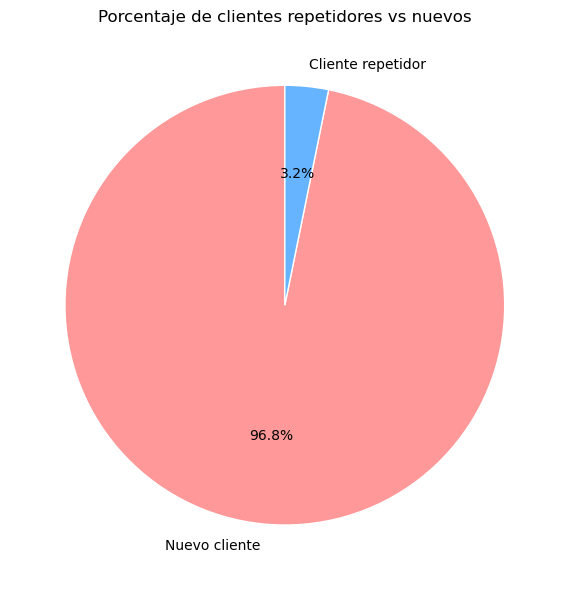

In [ ]:
# Contar cuántos clientes son nuevos (0) y cuántos son repetidores (1)
repeat_counts = df['is_repeated_guest'].value_counts()

labels = ['Nuevo cliente', 'Cliente repetidor']

plt.figure(figsize=(6,6))
# Crear un gráfico circular (pie chart) que muestra el porcentaje
# de clientes nuevos frente a repetidores
plt.pie(
    repeat_counts, 
    labels=labels, 
    autopct=lambda pct: f"{pct:.1f}%",
    startangle=90,
    colors=['#ff9999','#66b3ff'],
    wedgeprops={'edgecolor':'white'}
)
plt.title('Porcentaje de clientes repetidores vs nuevos')
plt.tight_layout()
plt.show()

Análisis volución de la tasa de cancelación por año de llegada. ¿Cómo ha variado la tasa de cancelación de reservas a lo largo de los años?

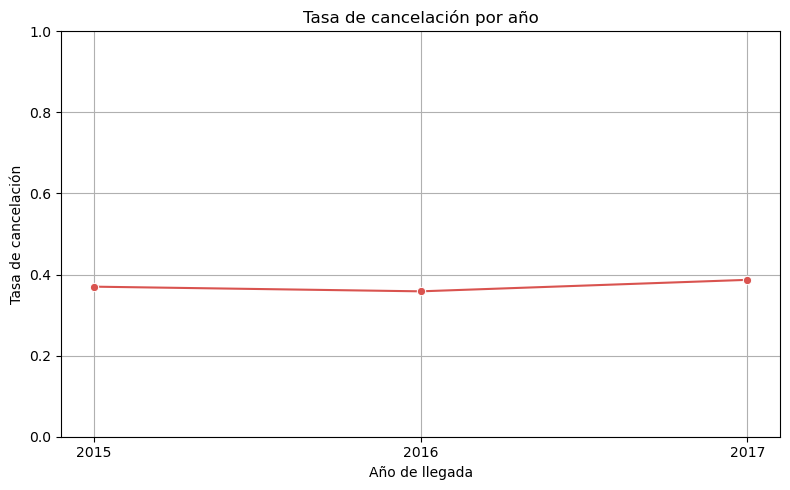

In [25]:
# Agrupar por año de llegada y calcular:
# - total de reservas
# - total de cancelaciones (suma de is_canceled, donde 1=cancelada)
year_stats = df.groupby(['arrival_date_year']).agg(
    total=('is_canceled', 'size'),
    canceled=('is_canceled', 'sum')
)

# Calcular la tasa de cancelación
year_stats['cancel_rate'] = year_stats['canceled'] / year_stats['total']

plt.figure(figsize=(8,5))

# Dibujar una línea con la evolución de la tasa de cancelación por año
sns.lineplot(data=year_stats, x=year_stats.index, y='cancel_rate', marker='o', color='#d9534f')

plt.xticks(year_stats.index) 

plt.ylabel('Tasa de cancelación')
plt.xlabel('Año de llegada')
plt.title('Tasa de cancelación por año')
plt.ylim(0,1) 
plt.grid(True)
plt.tight_layout()
plt.show()

### 5. Conclusiones

- Principales hallazgos

- Reflexiones sobre el comportamiento de los usuarios

- Posibles recomendaciones para retención